# Prova A1 - Linguagens de Programação

## Professor: Flávio Codeço Coelho
Esta prova vale 12 pontos, mas a nota máxima será de 10 pontos.
### Aluno: 

**Questão 1 (2 pontos):** Considere o seguinte código:

```python
import sys,os,re,fileinput; a=["exemplos/" + i[2][0] for i in os.walk('exemplos') if i[2]]; [sys.stdout.write(re.sub('at','op',j)) for j in fileinput.FileInput(a,inplace=True)]
```
 - Explique o que ele faz. 
 - Construa um exemplo para demonstrar sua utilização. 
 - Proponha uma modificação para tornar possível que este código, uma vez salvo em um script denominado `oneliner.py` seja utilizado da seguinte maneira: `python oneliner.py <arg1> <arg2>` onde `arg1` e `arg2` substituam as expressões regulares de `re.sub`. Esta modifição não pode adicionar novos imports ao código existente.

#### Solução:

In [1]:
import sys,os,re,fileinput

a=["exemplos/" + i[2][0] for i in os.walk('exemplos') if i[2]]

[sys.stdout.write(re.sub(sys.argv[1],sys.argv[2],j)) for j in fileinput.FileInput(a,inplace=True)]

[15, 14]

**Questão 2 (2.5 pontos):** Usando apenas a biblioteca Numpy, complete a função abaixo para desenhar um Histograma no terminal usando apenas caracteres.

```python
def horizontal(dados, bins, height=4, character = '|', null_char = '_'):
        """retorna uma string multilinha contendo um
       histograma dos dados.

        :Parameters:
            - `dados`: dados para o histograma
            - `bins`: numero de classes do histograma
            - `height`: altura maxima do histograma em caracteres
            - `character`: caracter a ser utilizado
            - `numm_chat`: caracter nulo a ser utilizado

        >>> d = normal(size=1000)
        >>> h = horizontal(d, 25, 5)
        >>> print(h)
            _________________________
            ____________|____________
            __________||||___________
            __________|||||__________
            _________|||||||_________
            _______||||||||||________
        """
```

#### Solução:

In [2]:
def horizontal(dados, bins, height=4, character = '|', null_char = '_'):
    dmin, dmax = min(dados), max(dados)
    tamanhos   = (dmax - dmin)/(bins - 1)
    hist       = [0]*bins
    
    for i in dados:
        hist[int((i - dmin)/tamanhos)] += 1
        
    espessura = max(hist) / height
    norm_hist = [int(i/espessura) for i in hist]
    texto     = ""
    
    for i in range(height, -1, -1):
        for k in range(bins):
            texto += character if norm_hist[k] > i else null_char
        texto += "\n"
        
    return texto + '{:0.2f}'.format(dmin) + ' '*(max(bins-9, 0)) + '{:0.2f}'.format(dmax)

In [3]:
import numpy as np
text = horizontal(np.random.normal(size=100000), 25, 5)

In [4]:
print(text)

_________________________
___________|_____________
__________||||___________
_________||||||__________
________||||||||_________
_______||||||||||________
-4.10                4.16


**Questão 3 (2.5 pontos):** Imagens são representadas como arrays de três dimensões. Uma imagem de tamanho $MxN$ pixels é representada por uma array de dimensões $(M,N,3)$ ou $(M,N,4)$, com as dimensões correpondendo aos canais $r,g,b$ ou $r,g,b,a$, onde o $a$ representa o canal alfa ou de transparência. Podemos usar a função [matplotlib.pyplot.imread](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html) para ler imagens em formato PNG, e podemos visualizá-las com [matplotlib.pyplot.imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow), como demonstrado no código abaixo. 
- Construa uma classe capaz de esconder uma mensagem de texto (ASCII) em uma imagem utilizando os bits do canal alfa para conter os caracteres. 
- A classe deve conter pelo menos dois métodos chamados `injeta_mensagem` e `extrai_mensagem`. Inclua linhas de código que usem a imagem fornecida `ada.png` para testar a sua classe com uma mensagem da sua escolha que ocupe pelo menos metade da capacidade de armazenamento da imagem. 
- mostre as imagens com e sem mensagens lado-a-lado para verificar se a mensagem causa alguma mudança perceptível (a olho nu) na imagem.
- É possível codificar uma mensagem codificada como Unicode usando este método? Se sim, como?, se não, porquê?

from matplotlib.pyplot import imread, imshow
%pylab inline

(281, 179, 4)


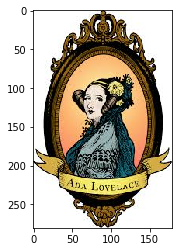

In [13]:
fig = imread('ada.png')
print(fig.shape)
imshow(fig)

#### Solução:

In [3]:
class codificador:
    length = 0
    
    def __init__ (self, fig):
        self.fig     = fig.copy()
        self.fig_msg = fig.copy()
        
    def injeta_mensagem (self, msg = ''):
        if len(msg) <= self.fig.shape[0]:
            self.length = len(msg)
            
            bits = [ord(char)/256 for char in msg]
            for i in range(self.length):
                self.fig_msg[0,i,3] = bits[i]
                
    def extrai_mensagem (self):
        bits = [None]*self.length
        
        for i in range(self.length):
            bits[i] = self.fig_msg[0,i,3]
            
        return ''.join([chr(int(bit*256)) for bit in bits])
    
    def comparar_imagens (self):
        print("Com mensagem")
        imshow(self.fig_msg)
        plt.show()
        print("Sem mensagem")
        imshow(self.fig)
        plt.show()

In [4]:
a = codificador(fig)

In [14]:
a.injeta_mensagem('hello I am Flávio, from another planet and would like to talk to you')

In [15]:
a.extrai_mensagem()

'hello I am Flávio, from another planet and would like to talk to you'

Com mensagem


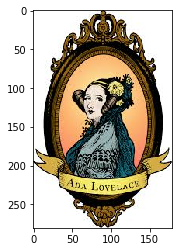

Sem mensagem


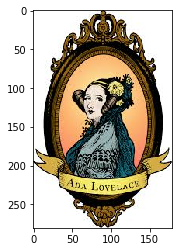

In [9]:
a.comparar_imagens()

**Questão 4 (5 pontos):** O índice de massa corporal($IMC=Peso/Alt^2$) é uma medida de associação entre peso e altura. Construa uma população como uma classe, que tenha as seguintes características:
1. os indivíduos tenham as seguintes características: sexo, altura e peso. Os indivíduos podem ser representados como tuplas. A altura média é de 170cm para homens e 160cm para mulheres, com desvios padrão de 2.5cm para ambos.
1. O indice de massa corporal tenha distribuição normal com média 20 e desvio padrão 1.
1. A classe seja capaz de retornar estatísticas(médias, desvio padrão e histogramas) sobre amostras da população de tamanho arbitrário (p.ex. 10 milhões) sem ter que manter listas de indivíduos na memória.
1. Gere uma amostra de 1 milhão de indivíduos,calcule o IMC amostral e mostre que este aproxima a distribuição do IMC da população, para cada sexo.
1. Calcule na amostra acima quantas pessoas apresentam obesidade, i.e. $IMC>30$.
